# Análisis descriptivo - CineVision Studios
Aquí se contiene la resolución del ejercicio #4 y #5 con las consultas correspondientes.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style="whitegrid")

file_path = "./movies.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

## Preguntas predefinidas

### Pregunta 9
¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la popularidad y los ingresos de las películas?

Correlaciones entre elenco y éxito de película:
                 castWomenAmount  castMenAmount  castWomenRatio  popularity  \
castWomenAmount         1.000000      -0.090474        0.367133   -0.001778   
castMenAmount          -0.090474       1.000000       -0.303371    0.002779   
castWomenRatio          0.367133      -0.303371        1.000000    0.007635   
popularity             -0.001778       0.002779        0.007635    1.000000   
revenue                -0.037397      -0.060143       -0.060991    0.162546   

                  revenue  
castWomenAmount -0.037397  
castMenAmount   -0.060143  
castWomenRatio  -0.060991  
popularity       0.162546  
revenue          1.000000  


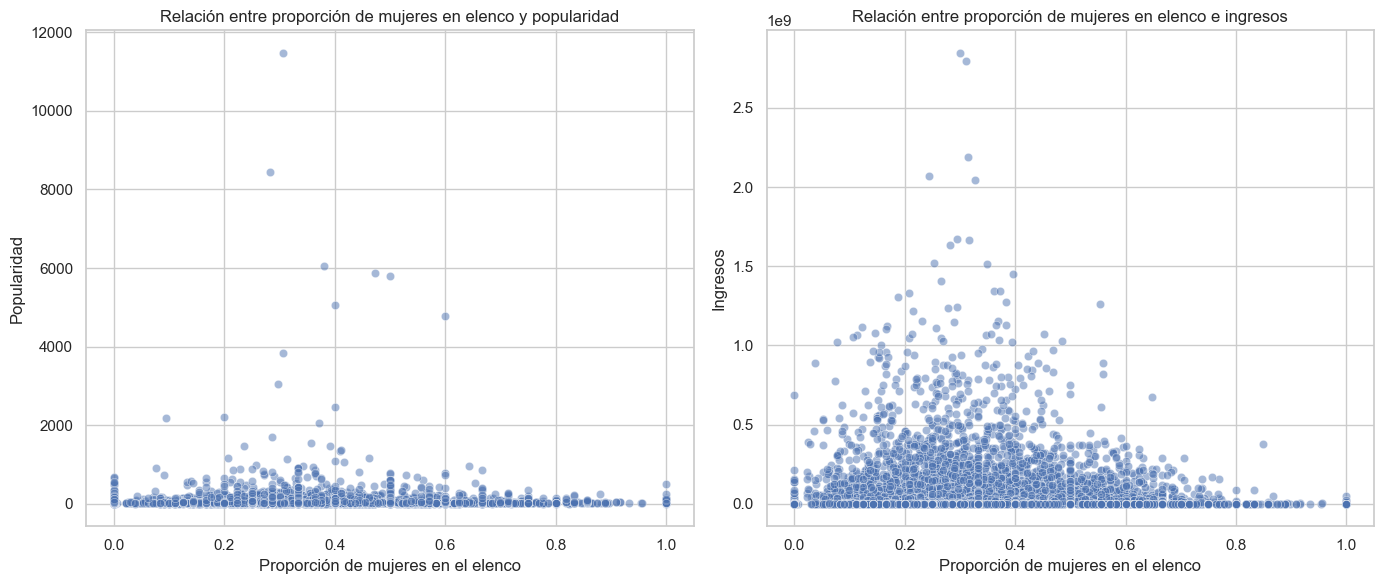

In [38]:

df["castWomenAmount"] = pd.to_numeric(df["castWomenAmount"], errors="coerce")
df["castMenAmount"] = pd.to_numeric(df["castMenAmount"], errors="coerce")
df["popularity"] = pd.to_numeric(df["popularity"], errors="coerce")
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce")

df["castWomenRatio"] = df["castWomenAmount"] / (df["castWomenAmount"] + df["castMenAmount"])

correlations = df[["castWomenAmount", "castMenAmount", "castWomenRatio", "popularity", "revenue"]].corr()
print("Correlaciones entre elenco y éxito de película:")
print(correlations)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df, x="castWomenRatio", y="popularity", alpha=0.5, ax=axes[0])
axes[0].set_title("Relación entre proporción de mujeres en elenco y popularidad")
axes[0].set_xlabel("Proporción de mujeres en el elenco")
axes[0].set_ylabel("Popularidad")

sns.scatterplot(data=df, x="castWomenRatio", y="revenue", alpha=0.5, ax=axes[1])
axes[1].set_title("Relación entre proporción de mujeres en elenco e ingresos")
axes[1].set_xlabel("Proporción de mujeres en el elenco")
axes[1].set_ylabel("Ingresos")

plt.tight_layout()
plt.show()

> Según los gráficos de correlación, se observa que la relación es bastante debil tomando en cuenta la proporción de mujeres como pivote. Dando como resultado que no sea posible asumir que la popularidad o los ingresos se relacionen con la proporción de hombres y mujeres en el reparto.

### Pregunta 10
¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?

In [39]:
df["voteAvg"] = pd.to_numeric(df["voteAvg"], errors="coerce")
df["director"] = df["director"].astype(str).str.split("|")
df_exploded = df.explode("director")
top_20_directors = df_exploded.nlargest(20, "voteAvg")["director"].unique()
print("Los 20 directores de las películas mejor calificadas:")
print(top_20_directors)

Los 20 directores de las películas mejor calificadas:
['Thomas Coven' 'Víctor Barba' 'Juan Olivares' 'Rebecca Sugar'
 'Laurent Bouzereau' 'Kaku Arakawa' 'Christin Baker' 'nan'
 'Miguel Angel Zavala' 'Dave Bullock' 'Troy Adomitis' 'Victor Cook'
 'Samuel Leong' 'Won Myeong-jun' 'Selena Quintanilla' 'Haruo Sotozaki']


### Pregunta 11
¿Cómo se correlacionan los presupuestos con los ingresos? ¿Los altos presupuestos significan altos ingresos? Haga los gráficos que necesite, histograma, diagrama de dispersión.

Correlación entre presupuesto e ingresos: 0.7186532245805861


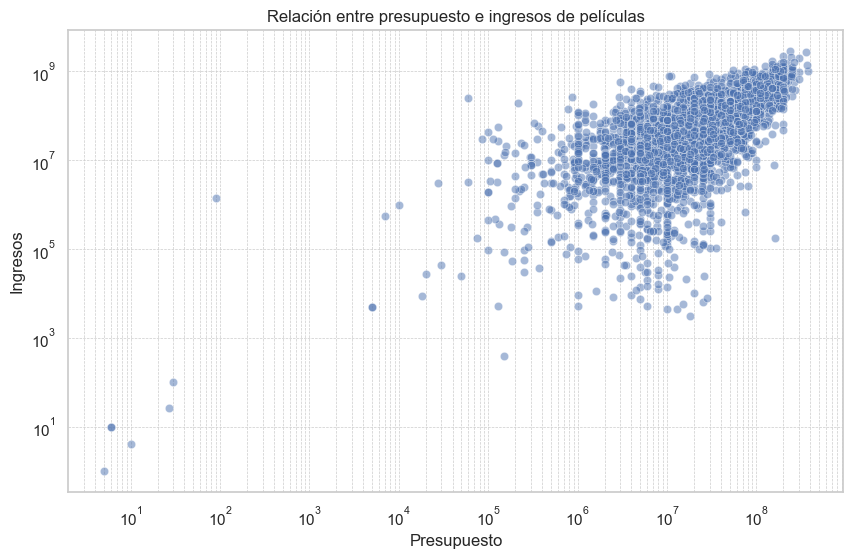

In [40]:
df["budget"] = pd.to_numeric(df["budget"], errors="coerce")
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce")

df_filtered = df[(df["budget"] > 0) & (df["revenue"] > 0)]

correlation = df_filtered["budget"].corr(df_filtered["revenue"])
print(f"Correlación entre presupuesto e ingresos: {correlation}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x="budget", y="revenue", alpha=0.5)
plt.title("Relación entre presupuesto e ingresos de películas")
plt.xlabel("Presupuesto")
plt.ylabel("Ingresos")
plt.xscale("log")  # Escala logarítmica para ver los datos de mejor manera
plt.yscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

> Parece ser que que sí existe un relación entre el presupuesto e ingresos, sin embargo, sí que hay algunas películas de presupuestos bajos que produjeron más, y también hay películas de altos presupuesto que produjeron mucho menos.

### Pregunta 12
¿Se asocian ciertos meses de lanzamiento con mejores ingresos?

Ingresos promedio por mes:
releaseMonth
1     6.946513e+07
2     8.299534e+07
3     9.710837e+07
4     1.019682e+08
5     1.652726e+08
6     1.658074e+08
7     1.327641e+08
8     7.077733e+07
9     6.033503e+07
10    8.497647e+07
11    1.403750e+08
12    1.355274e+08
Name: revenue, dtype: float64


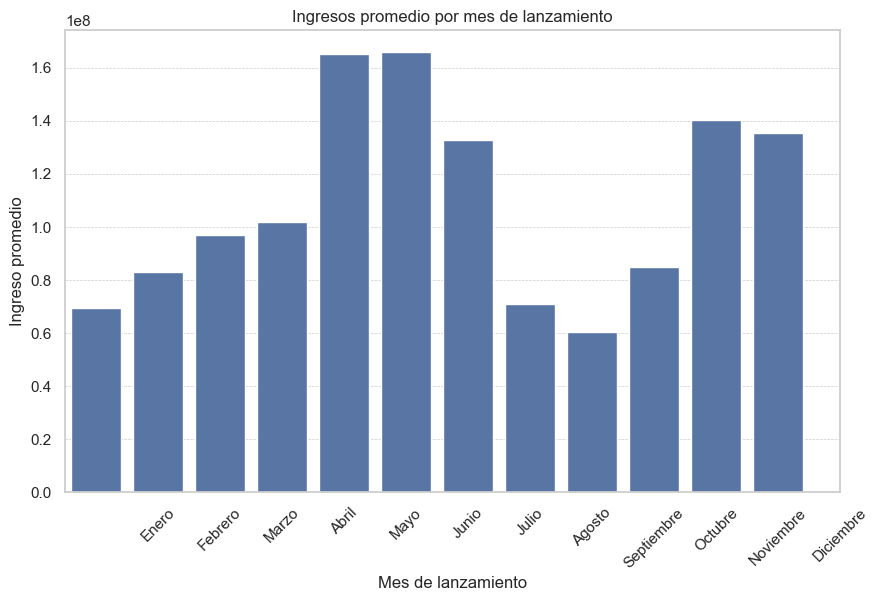

In [41]:
df["releaseDate"] = pd.to_datetime(df["releaseDate"], errors='coerce')
df["releaseMonth"] = df["releaseDate"].dt.month
df_valid = df[df["revenue"] > 0]
avg_revenue_by_month = df_valid.groupby("releaseMonth")["revenue"].mean()
print("Ingresos promedio por mes:")
print(avg_revenue_by_month)

# Graficar los ingresos promedio por mes
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_revenue_by_month.index, y=avg_revenue_by_month.values)
plt.title("Ingresos promedio por mes de lanzamiento")
plt.xlabel("Mes de lanzamiento")
plt.ylabel("Ingreso promedio")
plt.xticks(range(1, 13), [
    "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
    "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
], rotation=45)
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.show()

> Abril y Mayo principalmente podrían aumentar las posibilidades de tener mejores ingresos, parece ser que se lanzan películas esperadas o un aumento en la asistencia en cines que podría mejorar las ventas. Además de mencionar que también hay ventas altas a finales de año.

### Pregunta #13
¿En qué meses se han visto los lanzamientos con mejores ingresos? ¿Cuántas películas, en promedio, se han lanzado por mes?

El mes con los mayores ingresos totales es 6 con ingresos de 77597881637.0.
En promedio, se lanzan 833.33 películas por mes.


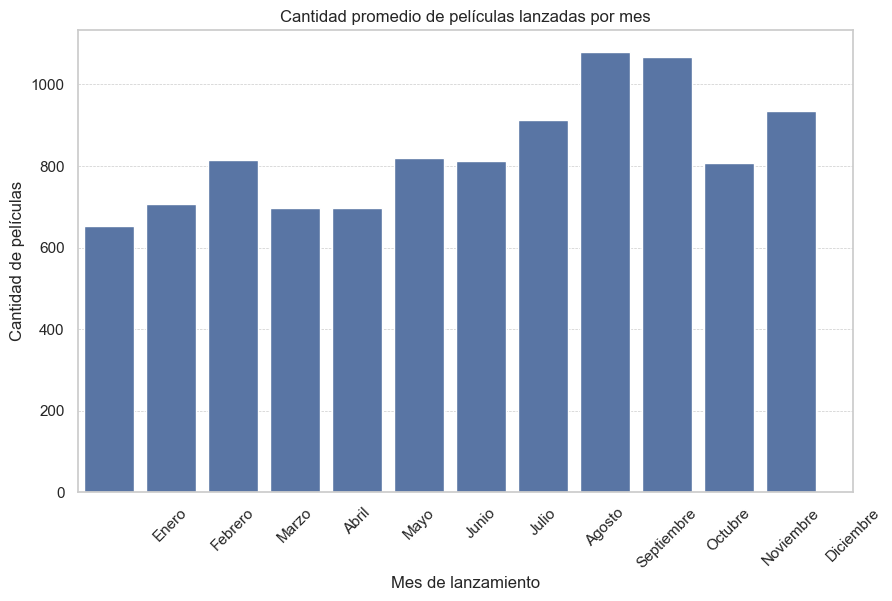

In [42]:
df["releaseDate"] = pd.to_datetime(df["releaseDate"], errors="coerce")
df["releaseMonth"] = df["releaseDate"].dt.month
df_valid = df[df["revenue"] > 0]

monthly_revenue = df_valid.groupby("releaseMonth")["revenue"].sum()
monthly_movie_count = df.groupby("releaseMonth").size()

avg_movies_per_month = monthly_movie_count.mean()

best_month = monthly_revenue.idxmax()
best_month_revenue = monthly_revenue.max()

# El mes con más ingresos totales
print(f"El mes con los mayores ingresos totales es {best_month} con ingresos de {best_month_revenue}.")
print(f"En promedio, se lanzan {avg_movies_per_month:.2f} películas por mes.") # Promedio de películas lanzadas por mes

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_movie_count.index, y=monthly_movie_count.values)
plt.title("Cantidad promedio de películas lanzadas por mes")
plt.xlabel("Mes de lanzamiento")
plt.ylabel("Cantidad de películas")
plt.xticks(range(1, 13), [
    "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
    "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
], rotation=45)
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.show()

> Junio es el mes en el que más ingresos se ha acumulado, es decir, han habido más estrenos taquilleros a comparación de otros meses, porque a diferencia de otros meses no ha llegado ha ser el mes con más lanzamientos.

### Pregunta 14
¿Cómo se correlacionan las calificaciones con el éxito comercial?

Correlación entre calificación promedio e ingresos: 0.16776338970352325


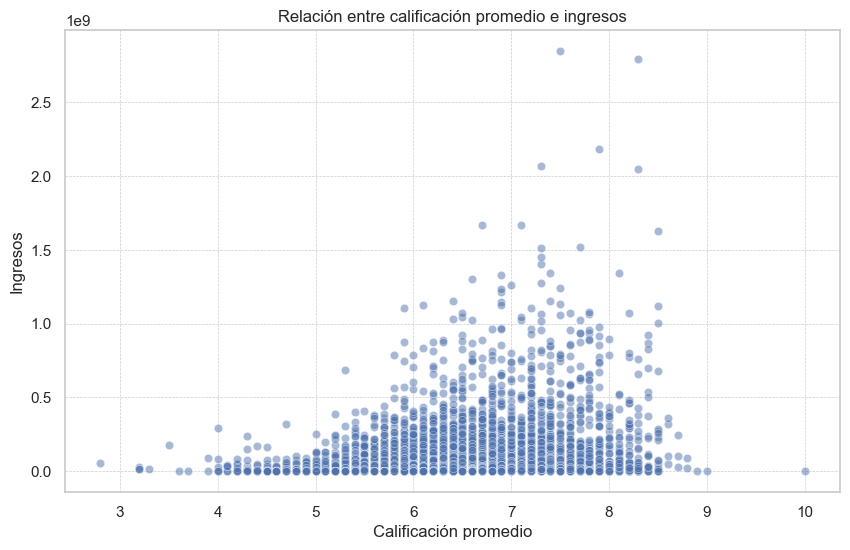

In [43]:
df["voteAvg"] = pd.to_numeric(df["voteAvg"], errors="coerce")
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce")
df_valid = df[(df["revenue"] > 0) & (df["voteAvg"].notna())]
correlation_rating_revenue = df_valid["voteAvg"].corr(df_valid["revenue"])
print(f"Correlación entre calificación promedio e ingresos: {correlation_rating_revenue}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_valid, x="voteAvg", y="revenue", alpha=0.5)
plt.title("Relación entre calificación promedio e ingresos")
plt.xlabel("Calificación promedio")
plt.ylabel("Ingresos")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

> Haciendo énfasis en la correlación (~0.1677) se puede ver que no necesariamente las películas con mayor calificación tienen mayores ingresos.

### Pregunta 15
¿Qué estrategias de marketing, como videos promocionales o páginas oficiales, generan mejores resultados?

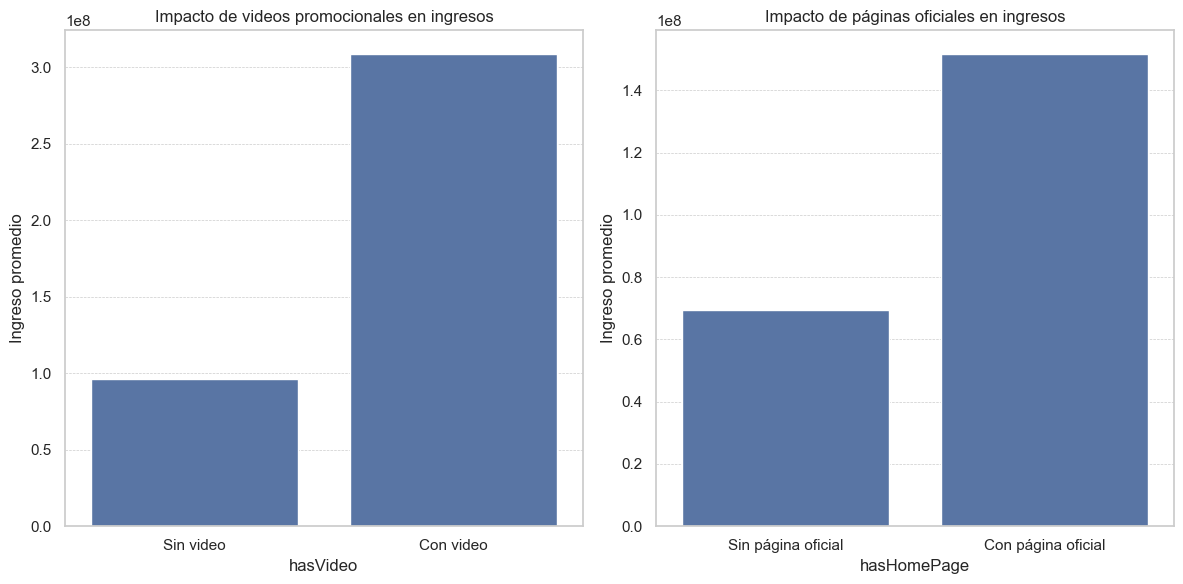

In [44]:
# Convertir la columna de ingresos a numérica
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce")

df_valid = df[df["revenue"] > 0].copy()
df_valid.loc[:, "hasVideo"] = df_valid["video"].astype(bool)
df_valid.loc[:, "hasHomePage"] = df_valid["homePage"].notna()

avg_revenue_by_video = df_valid.groupby("hasVideo")["revenue"].mean()
avg_revenue_by_homepage = df_valid.groupby("hasHomePage")["revenue"].mean()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=avg_revenue_by_video.index, y=avg_revenue_by_video.values, ax=axes[0])
axes[0].set_title("Impacto de videos promocionales en ingresos")
axes[0].set_xticks([0, 1])  
axes[0].set_xticklabels(["Sin video", "Con video"])
axes[0].set_ylabel("Ingreso promedio")
axes[0].grid(axis="y", linestyle="--", linewidth=0.5)

sns.barplot(x=avg_revenue_by_homepage.index, y=avg_revenue_by_homepage.values, ax=axes[1])
axes[1].set_title("Impacto de páginas oficiales en ingresos")
axes[1].set_xticks([0, 1]) 
axes[1].set_xticklabels(["Sin página oficial", "Con página oficial"])
axes[1].set_ylabel("Ingreso promedio")
axes[1].grid(axis="y", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()

> A simple vista se nota que las películas con videos promocionales son mucho más exitosas en términos monetarios, que las que no los tienen, además de tener cierta ventaja contra las páginas promocionales.

### Pregunta 16
¿La popularidad del elenco está directamente correlacionada con el éxito de taquilla?

Correlación entre la popularidad promedio del elenco y los ingresos: 0.1179


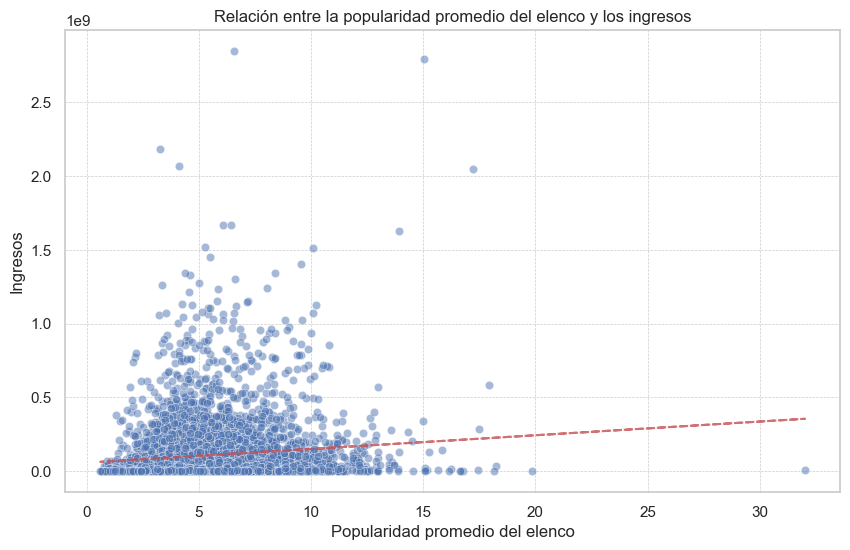

In [ ]:
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce")
df["actorsPopularity"] = df["actorsPopularity"].astype(str)

df["avg_actor_popularity"] = df["actorsPopularity"].apply(
    lambda x: pd.to_numeric(str(x).split("|"), errors="coerce").mean()
)

df_valid = df[(df["revenue"] > 0) & (df["avg_actor_popularity"].notna())]


correlation = df_valid["avg_actor_popularity"].corr(df_valid["revenue"])
print(f"Correlación entre la popularidad promedio del elenco y los ingresos: {correlation:.4f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_valid, x="avg_actor_popularity", y="revenue", alpha=0.5)
plt.title("Relación entre la popularidad promedio del elenco y los ingresos")
plt.xlabel("Popularidad promedio del elenco")
plt.ylabel("Ingresos")
plt.grid(True, linestyle="--", linewidth=0.5)

z = np.polyfit(df_valid["avg_actor_popularity"], df_valid["revenue"], 1)
p = np.poly1d(z)
plt.plot(df_valid["avg_actor_popularity"], p(df_valid["avg_actor_popularity"]), "r--", alpha=0.8)

plt.show()

> Tomando encuenta el elenco como un todo (promedio), podemos decir que su popularidad no se relaciona con los ingresos que puedan obtener, esto no quiere decir que las personas vean ciertas películas por ciertos actores, se necesitaría cierto análisis para llegar a esa conclusión.